In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
df1.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [6]:
df2 = pd.read_csv('image-predictions.tsv' , sep = '\t')

In [117]:
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [118]:
 df_list = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        created_at = json_data['created_at']
        entities = json_data['entities']
        
        truncated = json_data['truncated']
        full_text = json_data['full_text']
        fav_count = json_data['favorite_count']
        ret_count = json_data['retweet_count']
        df_list.append({'tweet_id' : (tweet_id),
                        'created_at' : (created_at), 
                        'entities' : (entities),
                         
                        'truncated' : (truncated),
                        'full_text' : (full_text),
                        'favorite_count' : (fav_count),
                        'retweet_count' : (ret_count)})
        
df3 = pd.DataFrame(df_list , columns = ['tweet_id' ,'created_at' , 'entities', 'truncated', 'full_text', 'favorite_count' , 'retweet_count' ])
df3.head(3)


,tweet_id,created_at,entities,truncated,full_text,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,This is Phineas. He's a mystical boy. Only eve...,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,This is Tilly. She's just checking pup on you....,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,This is Archie. He is a rare Norwegian Pouncin...,25461,4328


In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [121]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id          2354 non-null int64
created_at        2354 non-null object
entities          2354 non-null object
truncated         2354 non-null bool
full_text         2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: bool(1), int64(3), object(3)
memory usage: 112.7+ KB


## before i do anything i should make copy for these files 

In [122]:
# Create copies of original DataFrames to work off of
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

## ASSESS 

## this is programatically assess 

### I also did visual assess by loking for this file in exel

In [123]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [124]:
df1_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1638,6.841890e+17,NaN,NaN,2016-01-05 01:44:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786...,10,10,None,None,None,None,None
913,7.574000e+17,NaN,NaN,2016-07-25 02:20:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",She walks herself up and down the train to be ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757400162...,13,10,None,None,None,None,None
1399,6.996920e+17,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
35,8.855190e+17,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
557,8.033810e+17,NaN,NaN,2016-11-28 23:30:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803380650...,12,10,Sonny,None,None,None,None


In [125]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [126]:
sum(df1_clean['tweet_id'].duplicated())

7

In [127]:
df1_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [128]:
df1_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Assess df1
## Quilty 
1- name issues like a , the , none

2- delete unneccesary columns that i don't need for my analysis

3- data type for tweet id should be str and time ....

4- duplicate rows in tweet id

5- rename the name , rating_numarator

## tidiness
1- the dog category should be in one column

2- extract the id_tweet from expanded_urls 

In [129]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [130]:
sum(df2_clean['tweet_id'].duplicated())

0

In [131]:
df2_clean.sample(9)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,Lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
472,675145476954566656,https://pbs.twimg.com/media/CV6ZOPqWsAA20Uj.jpg,1,Labrador_retriever,0.458746,True,Great_Dane,0.235504,True,Staffordshire_bullterrier,0.116864,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,0.006448,False
1625,803773340896923648,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,0.817066,True,redbone,0.059707,True,Irish_terrier,0.034195,True
1844,838916489579200512,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False


## ASSESS df2
## QUALITY 
1- data type in tweet_id should be str

2-rename some column with appropriete name
 

In [132]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id          2354 non-null int64
created_at        2354 non-null object
entities          2354 non-null object
truncated         2354 non-null bool
full_text         2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: bool(1), int64(3), object(3)
memory usage: 112.7+ KB


In [133]:
df3_clean.sample(5)

,tweet_id,created_at,entities,truncated,full_text,favorite_count,retweet_count
815,770772759874076672,Tue Aug 30 23:58:40 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,This is Sebastian. He's super h*ckin fluffy. T...,5749,1626
1860,675432746517426176,Fri Dec 11 21:51:30 +0000 2015,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,Happy Friday. Here's some golden puppers. 12/1...,1623,627
1263,709901256215666688,Wed Mar 16 00:37:03 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,WeRateDogs stickers are here and they're 12/10...,732,112
1048,743210557239623680,Wed Jun 15 22:36:19 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,"Meet Kayla, an underground poker legend. Playe...",4215,1560
1557,688547210804498433,Sun Jan 17 02:23:42 +0000 2016,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,This is Frönq. He got caught stealing a waffle...,2862,789


In [134]:
sum(df3_clean['tweet_id'].duplicated())

0

## ASSESS df3
## Quality
1- data type in tweet_id

2- delete entities ,truncated that i don't need in my analysis

3- rename column with appropriete name

4- data type of 'dog_category' need to change

## Tidiness
1- join df2 with df3 to be in the same data frame.

## CLEAN DF1
1- remove the rows that doesn't had correct name like a , the , none

In [135]:
#remove none,a,an,the
df1_clean['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
an             7
Toby           7
Daisy          7
Bailey         7
Scout          6
Stanley        6
Rusty          6
Milo           6
Oscar          6
Koda           6
Leo            6
Dave           6
Bella          6
Jack           6
Jax            6
Sammy          5
            ... 
Keet           1
Griswold       1
Jareld         1
Tilly          1
Siba           1
Molly          1
old            1
Pluto          1
Herb           1
Maxwell        1
Iggy           1
Tayzie         1
Richie         1
Karll          1
Ralphson       1
Dixie          1
Pancake        1
Darby          1
Remy           1
Bonaparte      1
Fido           1
Fiji           1
Cilantro       1
Anna           1
Lorelei        1
Severus        1
Andy           1
Olaf          

In [136]:
#remove none,a,an,the
## Code
df1_clean = df1_clean.query('name != "the"')

In [137]:
df1_clean = df1_clean.query('name != "None"')

In [138]:
df1_clean = df1_clean.query('name != "a"')

In [139]:
df1_clean = df1_clean.query('name != "an"')

In [140]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,8.909720e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,8.906090e+17,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,8.902400e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,8.900070e+17,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,8.898810e+17,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


In [141]:
## TEST
df1_clean['name'].value_counts()

Charlie         12
Cooper          11
Oliver          11
Lucy            11
Lola            10
Penny           10
Tucker          10
Winston          9
Bo               9
Sadie            8
Buddy            7
Daisy            7
Bailey           7
Toby             7
Koda             6
Leo              6
Scout            6
Rusty            6
Milo             6
Bella            6
Oscar            6
Dave             6
Stanley          6
Jax              6
Jack             6
Finn             5
very             5
Sammy            5
Larry            5
Alfie            5
                ..
Griswold         1
Jareld           1
Tilly            1
Siba             1
Molly            1
Alexanderson     1
Sailor           1
old              1
Pluto            1
Herb             1
Tayzie           1
Richie           1
Karll            1
Ralphson         1
Dixie            1
Pancake          1
Darby            1
Remy             1
Bonaparte        1
Fido             1
Fiji             1
Cilantro    

## delete the columns that i don't need in my analysis
2-delete columns(in_reply_to_statuse_id , in_reply_to_user_id , retweeted_statuse-id,retweeted_statuse_user_id , retweeted_statuse_timespam, rating_denominator)

In [142]:
## code
droping = ['in_reply_to_status_id' , 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','rating_denominator'] 
df1_clean = df1_clean.drop(droping, axis=1)

In [143]:
## TEST
df1_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,8.921770e+17,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,8.918150e+17,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,8.916900e+17,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,8.913280e+17,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None


## change the datatype 

### 3- change the datatype for tweet_id to str and timestamp to time

In [144]:
## code
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype('str')

In [145]:
## TEST
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 2326
Data columns (total 11 columns):
tweet_id            1541 non-null object
timestamp           1541 non-null datetime64[ns]
source              1541 non-null object
text                1541 non-null object
expanded_urls       1541 non-null object
rating_numerator    1541 non-null int64
name                1541 non-null object
doggo               1541 non-null object
floofer             1541 non-null object
pupper              1541 non-null object
puppo               1541 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 144.5+ KB


## duplicates rows
### there are duplicte rows in tweet_id and i'm gonaa to drop it

In [146]:
## code
df1_clean['tweet_id'].drop_duplicates(inplace=True)

In [147]:
## test
sum(df1_clean['tweet_id'].duplicated())

0

## rename columns with approprite name
### 4- rename the column 'name' to 'dog_name' & '	rating_numerator' to 'dogs_rating'

In [148]:
## code
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
df1_clean.rename(columns={'name' : 'dog_name' , 'rating_numerator' : 'dogs_rating'}, inplace =True)

In [149]:
## Test
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,dogs_rating,dog_name,doggo,floofer,pupper,puppo
0,8.92421e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,8.92177e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,8.91815e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,8.9169e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,8.91328e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None
6,8.90972e+17,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None,None,None,None
8,8.90609e+17,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None,None,None,None
9,8.9024e+17,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,None,None,None
10,8.90007e+17,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,Koda,None,None,None,None
11,8.89881e+17,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,Bruno,None,None,None,None


## 5- here i'm going to change the data type of "dog_category" to category

## TIDINESS 
### 1- dog_category

In [150]:
## test
df1_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,dogs_rating,dog_name,doggo,floofer,pupper,puppo
660,7.91312e+17,2016-10-26 16:14:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Mabel. She's super h*ckin smol. Portab...,https://twitter.com/dog_rates/status/791312159...,12,Mabel,None,None,None,None
2011,6.72245e+17,2015-12-03 02:45:32,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,https://twitter.com/dog_rates/status/672245253...,12,Snickers,None,None,None,None
1337,7.05102e+17,2016-03-02 18:48:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Terrenth. He just stubbed his toe. 10/...,https://twitter.com/dog_rates/status/705102439...,10,Terrenth,None,None,None,None
1307,7.07316e+17,2016-03-08 21:23:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Finnegus. He's trapped in a snow globe...,https://twitter.com/dog_rates/status/707315916...,10,Finnegus,None,None,pupper,None
1435,6.97259e+17,2016-02-10 03:22:44,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,https://twitter.com/dog_rates/status/697259378...,8,getting,None,None,None,None


In [151]:
 
df1_clean['dog_category'] = df1_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [152]:
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
48,8.829920e+17,NaN,NaN,2017-07-06 15:58:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None
475,8.160620e+17,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.160000e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
794,7.733370e+17,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Fizz. She thinks love is a...,7.710000e+17,4.196984e+09,2016-09-01 16:14:48 +0000,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
1064,7.409950e+17,NaN,NaN,2016-06-09 19:52:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He's a vape god. Blows o's for da...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740995100...,10,10,Leo,None,None,None,None
196,8.547330e+17,NaN,NaN,2017-04-19 16:25:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marlee. She fetched a flower and immed...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854732716...,12,10,Marlee,None,None,None,None


In [153]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
df1_clean = df1_clean.drop(columns, axis=1)

In [154]:
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,dogs_rating,dog_name,dog_category
0,8.92421e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,8.92177e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,8.91815e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,8.9169e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,8.91328e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN
6,8.90972e+17,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,NaN
8,8.90609e+17,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,NaN
9,8.9024e+17,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo
10,8.90007e+17,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,Koda,NaN
11,8.89881e+17,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,Bruno,NaN


In [155]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,dogs_rating,dog_name,dog_category
0,8.92421e+17,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,8.92177e+17,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,8.91815e+17,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,8.9169e+17,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,8.91328e+17,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN


In [156]:
df1_clean['TWEET_ID'] = df1_clean['expanded_urls'].str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{12})', expand=True)
 
df1_clean = df1_clean.drop('expanded_urls', axis=1)
df1_clean = df1_clean.drop('tweet_id', axis=1)

In [157]:
df1_clean['TWEET_ID']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
6       890971913173991426
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      887473957103951883
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
31      886258384151887873
33      885984800019947520
34      885528943205470208
36      830583320585068544
38      884925521741709313
               ...        
2270    667502640335572993
2271    667495797102141441
2274    667455448082227200
2275    667453023279554560
2279    667405339315146752
2280    667393430834667520
2

In [158]:
df1_clean

,timestamp,source,text,dogs_rating,dog_name,dog_category,TWEET_ID
0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,892420643555336193
1,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,NaN,892177421306343426
2,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN,891815181378084864
3,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,NaN,891689557279858688
4,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,NaN,891327558926688256
6,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,NaN,890971913173991426
8,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,Zoey,NaN,890609185150312448
9,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,doggo,890240255349198849
10,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,Koda,NaN,890006608113172480
11,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13,Bruno,NaN,889880896479866881


## ASSESS df2
## Quality
1- change the data type of tweet_id to str

In [159]:
## code
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype('str')

In [160]:
## test
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## 2- rename some columns with appropriete name 

In [161]:
## code
df2_clean.rename(columns={'p1' : 'prediction_1' , 'p1_conf' : 'confident_1' , 'p1_dog' : 'is_dog_1',
                    'p2' : 'prediction_2' ,'p2_conf' : 'confident_2', 'p2_dog' : 'is_dog_2',
                     'p3' : 'prediction_3' ,'p3_conf' : 'confident_3', 'p3_dog' : 'is_dog_3'}, inplace =True)

In [162]:
## test
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        2075 non-null object
jpg_url         2075 non-null object
img_num         2075 non-null int64
prediction_1    2075 non-null object
confident_1     2075 non-null float64
is_dog_1        2075 non-null bool
prediction_2    2075 non-null object
confident_2     2075 non-null float64
is_dog_2        2075 non-null bool
prediction_3    2075 non-null object
confident_3     2075 non-null float64
is_dog_3        2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## ASSESS df3
## Quality


### 1- change the data type of tweet_id to str

In [163]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id          2354 non-null int64
created_at        2354 non-null object
entities          2354 non-null object
truncated         2354 non-null bool
full_text         2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: bool(1), int64(3), object(3)
memory usage: 112.7+ KB


In [164]:
## code
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype('str')

In [165]:
## test
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
tweet_id          2354 non-null object
created_at        2354 non-null object
entities          2354 non-null object
truncated         2354 non-null bool
full_text         2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: bool(1), int64(2), object(4)
memory usage: 112.7+ KB


## 2- delete entities ,truncated that i don't need in my analysis that i don't need

In [166]:
## code
columns = ['entities', 'truncated']
df3_clean = df3_clean.drop(columns,axis=1)

In [167]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null object
created_at        2354 non-null object
full_text         2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


## 3- rename (created_at) to (creating_time)

In [168]:
## code
df3_clean = df3_clean.rename(columns={'created_at' : 'creating_time'})

In [169]:
## test
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null object
creating_time     2354 non-null object
full_text         2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


## TIDINESS df3
## 1- joining df2 and df3 to be one dataframe 

In [170]:
## code
df4_new = pd.merge(df2_clean,df3_clean, on='tweet_id')

In [171]:
## test
df4_new.head()

,tweet_id,jpg_url,img_num,prediction_1,confident_1,is_dog_1,prediction_2,confident_2,is_dog_2,prediction_3,confident_3,is_dog_3,creating_time,full_text,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Sun Nov 15 22:32:08 +0000 2015,Here we have a Japanese Irish Setter. Lost eye...,2535,532
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...,132,48
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...,128,47
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...,311,147
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...,111,41


In [196]:
# save to csv
#p_df.to_csv('/path/to/data.csv', index=Fals)
df4_new.to_csv('twitter_archive_master.csv',index=False)

In [173]:
df4_new

,tweet_id,jpg_url,img_num,prediction_1,confident_1,is_dog_1,prediction_2,confident_2,is_dog_2,prediction_3,confident_3,is_dog_3,creating_time,full_text,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Sun Nov 15 22:32:08 +0000 2015,Here we have a Japanese Irish Setter. Lost eye...,2535,532
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Sun Nov 15 23:05:30 +0000 2015,This is a western brown Mitsubishi terrier. Up...,132,48
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,Sun Nov 15 23:21:54 +0000 2015,Here is a very happy pup. Big fan of well-main...,128,47
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Mon Nov 16 00:04:52 +0000 2015,This is a purebred Piers Morgan. Loves to Netf...,311,147
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Mon Nov 16 00:24:50 +0000 2015,Here we have a 1949 1st generation vulpix. Enj...,111,41
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Mon Nov 16 00:30:50 +0000 2015,This is a truly beautiful English Wilson Staff...,136,60
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Mon Nov 16 00:35:11 +0000 2015,This is an odd dog. Hard on the outside but lo...,1253,879
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,Mon Nov 16 00:49:46 +0000 2015,Here is a Siberian heavily armored polar bear ...,448,261
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,Mon Nov 16 00:55:59 +0000 2015,My oh my. This is a rare blond Canadian terrie...,304,146
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,Mon Nov 16 01:01:59 +0000 2015,Here is the Rand Paul of retrievers folks! He'...,115,61


In [174]:
df4_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id          2073 non-null object
jpg_url           2073 non-null object
img_num           2073 non-null int64
prediction_1      2073 non-null object
confident_1       2073 non-null float64
is_dog_1          2073 non-null bool
prediction_2      2073 non-null object
confident_2       2073 non-null float64
is_dog_2          2073 non-null bool
prediction_3      2073 non-null object
confident_3       2073 non-null float64
is_dog_3          2073 non-null bool
creating_time     2073 non-null object
full_text         2073 non-null object
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
dtypes: bool(3), float64(3), int64(3), object(7)
memory usage: 232.8+ KB


In [175]:
df1_clean.to_csv('first_twiter_clean.csv',index=False)

In [176]:
df1_clean

,timestamp,source,text,dogs_rating,dog_name,dog_category,TWEET_ID
0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,892420643555336193
1,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,NaN,892177421306343426
2,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN,891815181378084864
3,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,NaN,891689557279858688
4,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,NaN,891327558926688256
6,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,NaN,890971913173991426
8,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,Zoey,NaN,890609185150312448
9,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,doggo,890240255349198849
10,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,Koda,NaN,890006608113172480
11,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13,Bruno,NaN,889880896479866881


## here i'm going to iterate the assess and cleaning phase because i descover i need to assess and other things after joining these files together

In [177]:
## test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 2326
Data columns (total 7 columns):
timestamp       1541 non-null datetime64[ns]
source          1541 non-null object
text            1541 non-null object
dogs_rating     1541 non-null int64
dog_name        1541 non-null object
dog_category    219 non-null object
TWEET_ID        1490 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 96.3+ KB


In [178]:
 df1_clean.sample(20)

,timestamp,source,text,dogs_rating,dog_name,dog_category,TWEET_ID
1282,2016-03-12 19:35:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,11,Coco,NaN,708738143638450176
1388,2016-02-18 23:28:52,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,6,Murphy,NaN,700462010979500032
706,2016-10-10 17:32:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,11,Dallas,NaN,785533386513321988
1716,2015-12-25 02:01:30,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,12,Toby,NaN,680206703334408192
1119,2016-05-14 00:49:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,12,Solomon,NaN,731285275100512256
406,2017-01-24 02:28:08,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Balto. He's very conten...,12,Balto,NaN,NaN
1201,2016-04-03 02:08:05,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,13,Ozzy,pupper,NaN
1311,2016-03-08 01:52:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,12,Tucker,NaN,707021089608753152
1086,2016-06-02 00:32:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Axel. He's a professional leaf catcher...,12,Axel,NaN,738166403467907072
514,2016-12-21 17:39:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Augie. He's a savage. Doesn't give a h...,10,Augie,NaN,811627233043480576


## i descover there are null value in tweet_id , so i'm going to remove them

In [179]:
sum(df1_clean['TWEET_ID'].isnull())

51

In [180]:
df1_clean = df1_clean.dropna(subset=['TWEET_ID'])

In [181]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1490 entries, 0 to 2326
Data columns (total 7 columns):
timestamp       1490 non-null datetime64[ns]
source          1490 non-null object
text            1490 non-null object
dogs_rating     1490 non-null int64
dog_name        1490 non-null object
dog_category    209 non-null object
TWEET_ID        1490 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 93.1+ KB


## then here i'm going to change the order of columns to begin with tweet_id

In [182]:
df1_clean= df1_clean[['TWEET_ID', 'timestamp','source' , 'text', 'dogs_rating' , 'dog_name' , 'dog_category']]

In [183]:
df1_clean

,TWEET_ID,timestamp,source,text,dogs_rating,dog_name,dog_category
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,doggo
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,Koda,NaN
11,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13,Bruno,NaN


In [184]:
df1_clean.rename(columns={'TWEET_ID' : 'tweet_id'})

,tweet_id,timestamp,source,text,dogs_rating,dog_name,dog_category
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,Jax,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,doggo
10,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,13,Koda,NaN
11,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,13,Bruno,NaN


In [185]:
## the most name 
## the most category by viual 
## the most breed has rating
## the most prediction 

## Here i'm going analysis this data ...

### what's the name of most dogs??

In [186]:
df1_clean['dog_name'].value_counts()

Charlie      12
Cooper       11
Oliver       11
Lucy         10
Penny        10
Tucker       10
Winston       9
Lola          9
Bo            9
Sadie         8
Toby          7
Buddy         7
Daisy         7
Rusty         6
Bella         6
Dave          6
Jax           6
Leo           6
Milo          6
Scout         6
Bailey        6
Koda          6
Jack          6
Stanley       6
Oakley        5
Alfie         5
Finn          5
very          5
Sunny         5
Phil          5
             ..
Keet          1
Griswold      1
Jareld        1
Tilly         1
Siba          1
Molly         1
Pluto         1
Herb          1
Maxwell       1
Monty         1
Iggy          1
Tayzie        1
Richie        1
Karll         1
Ralphson      1
Dixie         1
Pancake       1
his           1
Darby         1
Remy          1
Bonaparte     1
Fido          1
Fiji          1
Cilantro      1
Anna          1
Lorelei       1
Severus       1
Andy          1
Olaf          1
Bones         1
Name: dog_name, Length: 

### so as we can see the most name that dogs had (Charlie, Cooper  ,Oliver )

In [187]:
## and now i'm going to see the most breed of dogs

In [188]:
df1_clean['dog_category'].value_counts()

pupper     137
doggo       48
puppo       22
floofer      2
Name: dog_category, dtype: int64

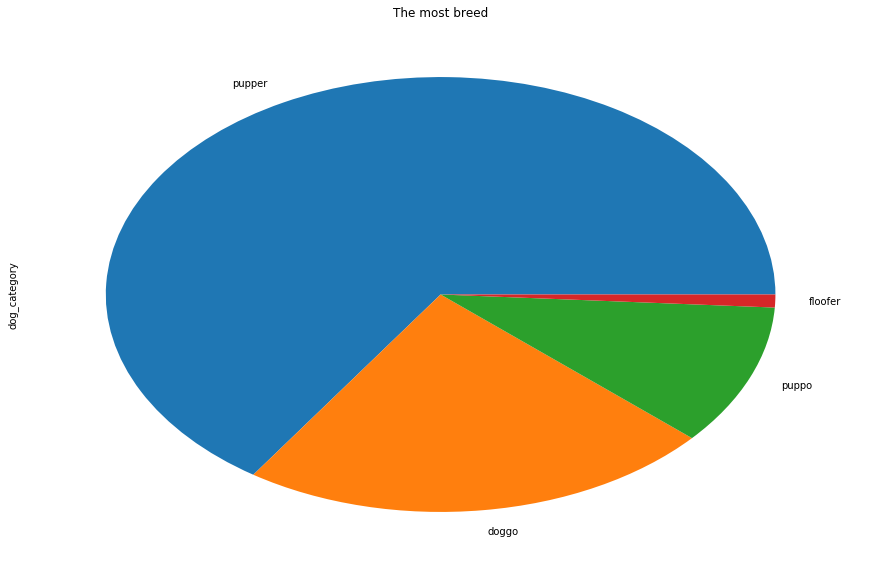

In [189]:
df1_clean['dog_category'].value_counts().plot(kind='pie',title='The most breed',figsize=(15,10));

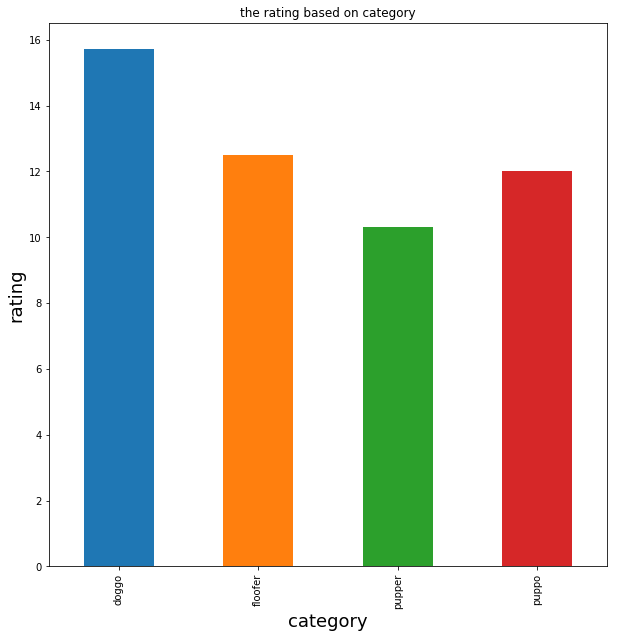

In [190]:
df1_clean.groupby('dog_category')['dogs_rating'].mean().plot(kind='bar',title =('the rating based on category'),figsize=(10,10));
plt.xlabel('category',fontsize=18);
plt.ylabel('rating',fontsize=18);

In [191]:
df4_new['prediction_1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      88
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         18
beagle                        18
Maltese_dog                   18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

### as we can see the most prediction done in (golden_retriever , Labrador_retriever, Pembroke                   Chihuahua  )

### what are the images which had the most like??? 

In [192]:
ff = df4_new[['jpg_url','favorite_count']]

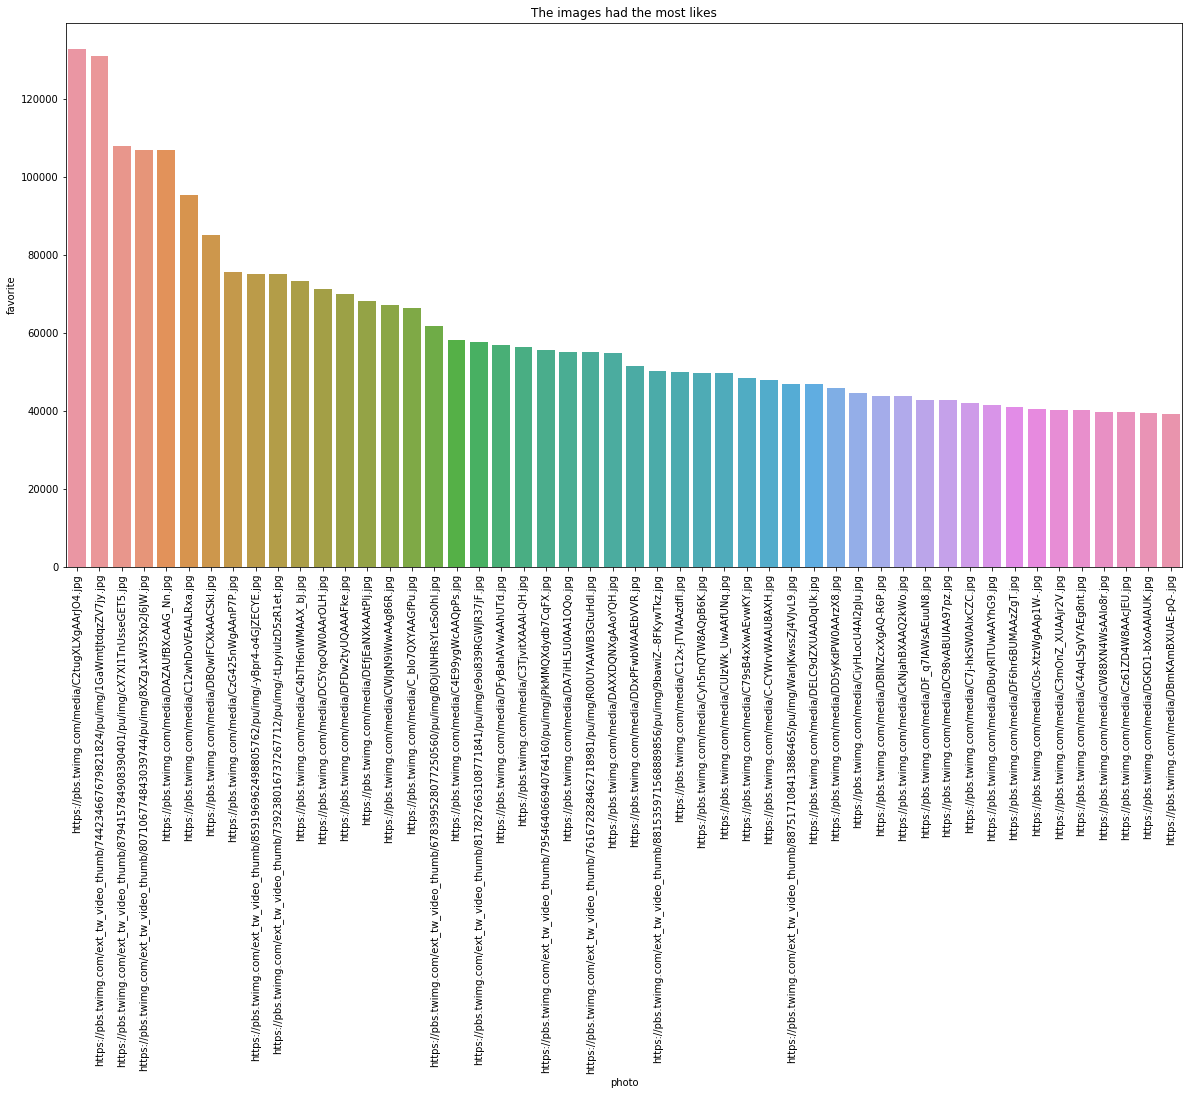

In [193]:
plt.figure(figsize=[20,10])
sns.barplot(data=ff.sort_values(by='favorite_count', ascending=False)[0:50], x='jpg_url', y='favorite_count')
plt.xticks(rotation=90)
plt.xlabel('photo')
plt.ylabel('favorite')
plt.title('The images had the most likes');

## and what are the images had most 

In [194]:
fv = df4_new[['jpg_url','retweet_count']]

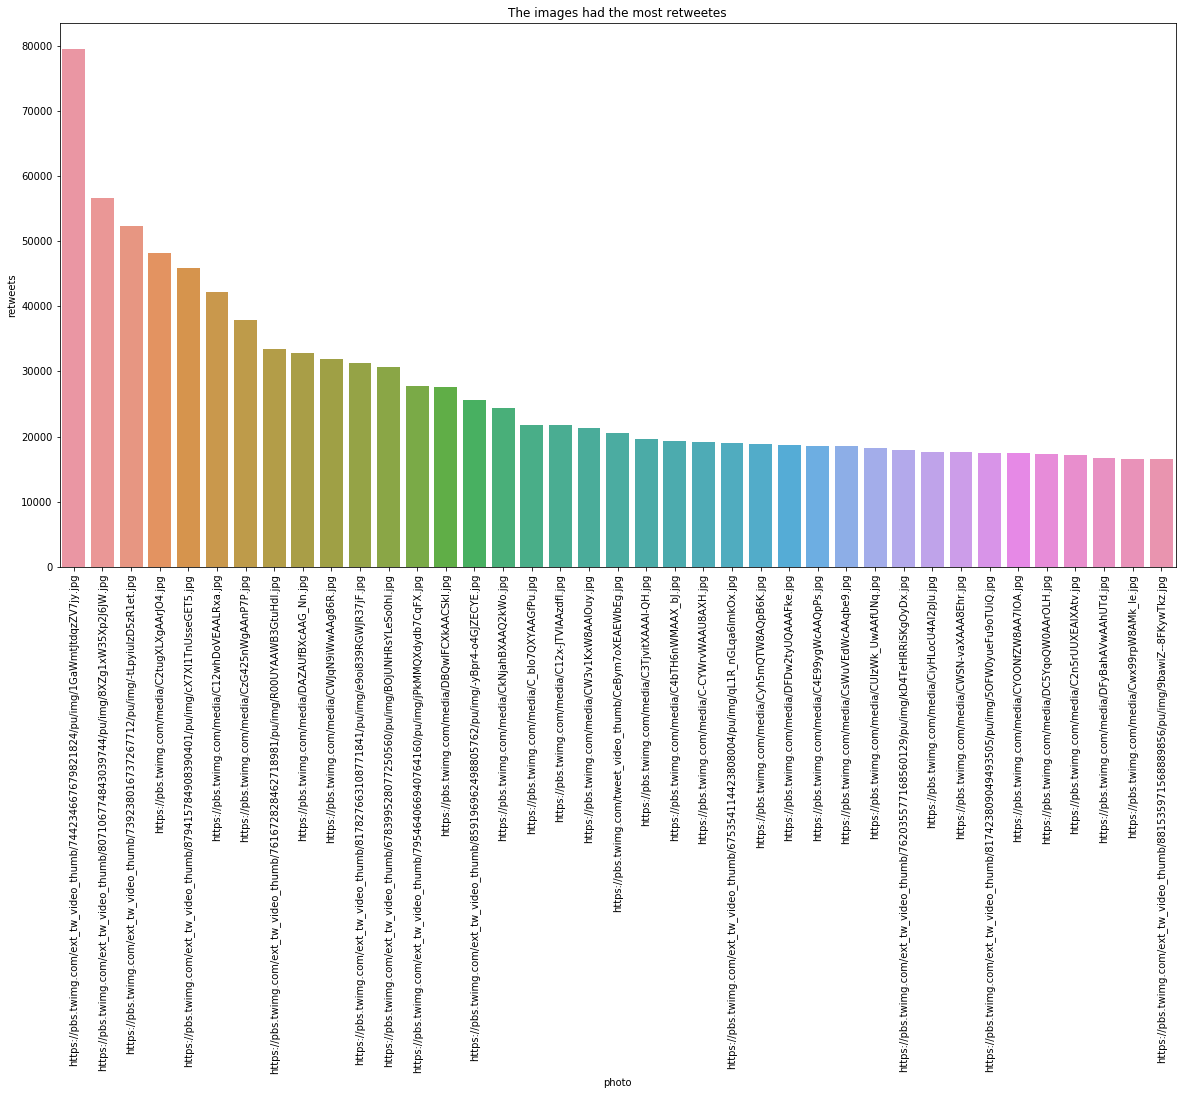

In [195]:
plt.figure(figsize=[20,10])
sns.barplot(data=fv.sort_values(by='retweet_count', ascending=False)[0:50], x='jpg_url', y='retweet_count')
plt.xticks(rotation=90)
plt.xlabel('photo')
plt.ylabel('retweets')
plt.title('The images had the most retweetes');